---
# **Lab Report 01**
## **Name   : Muhammad Ehtisham Saleem**
## **Reg No : B22F1242AI108**
## **Lab : Artificial Neural Network**
## **Submitted To : Mam Ammara Irfan**
## **Course Instructor : Dr Arshad Iqbal**
---

---



# **Implementing a Custom fit() Function and Visualizing Accuracy for Linear Regression**
## **Introduction**:
>In this lab task, I developed a fit function that covers the process of approximating and modeling data accurately. The task focuses on creating a function to find the best-fit curve for a given dataset, utilizing various fitting techniques. This allows for efficient data analysis and prediction, helping to understand the application of mathematical models in real-world data.

## **Objective**
The objective of this lab is to:
* Implement a linear regression model from scratch.
* Create a custom fit() function using gradient descent.
* Visualize loss (accuracy) over epochs.
* Display the regression line with actual data points.

## **Step 1: Import Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## **Explanation:**
* numpy: For numerical operations (arrays, dot products, etc.).
* matplotlib.pyplot: For plotting graphs.

## **Step 2: Generate Sample Data**

In [3]:
np.random.seed(42)  # Ensure reproducibility
X = 2 * np.random.rand(100, 1)  # Random 100 samples (0 to 2)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear equation with noise


## **Explanation:**
* **X:** 100 random points between 0 and 2.
* **y:** Generated using y = 4 + 3X + noise.
* **np.random.seed(42):** Fixes randomness for consistent results.

## **Step 3: Add Bias Term to the Input (X)**

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # Add a column of ones (bias term)


## **Explanation:**
* Bias Term: Adds a constant feature of 1 to X for the intercept.
* np.c_[ ]: Joins arrays column-wise.


## **Step 4: Create a Custom Linear Regression Class**

In [5]:
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.losses = []  # Store loss for each epoch


# **Explanation:**
* **learning_rate:** Speed of learning (step size).
* **epochs:** Number of times the model trains on the data.
* **weights:** Model parameters.
* **losses:** List to store loss per epoch for accuracy visualization.

## **Step 5: Implement the Custom fit() Function**

In [6]:
    def fit(self, X, y):
        self.weights = np.zeros((X.shape[1], 1))  # Initialize weights

        for epoch in range(self.epochs):
            predictions = X.dot(self.weights)  # ŷ = XW
            error = predictions - y            # Error = ŷ - y
            gradients = (2 / X.shape[0]) * X.T.dot(error)  # ∇ = 2/N * Xᵀ(ŷ - y)
            self.weights -= self.learning_rate * gradients  # Update weights

            # Calculate and store loss
            loss = np.mean(error**2)  # MSE: Mean Squared Error
            self.losses.append(loss)

            # Display loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


## **Explanation:**
* **Initialize Weights:** Start with zeros.
* **Loop through Epochs:** Repeatedly update weights.
* **Predictions:** Compute predicted ŷ = XW.
* **Error:** Find difference (ŷ - y).
* **Gradients:** Calculate using the derivative of MSE.
* **Update Weights:** W = W - α * Gradient using Gradient Descent.
* **Track Loss:** Compute Mean Squared Error (MSE) for each epoch.
* **Log Progress:** Print loss every 100 epochs.

## **Step 6: Implement the predict() Function**

In [7]:
    def predict(self, X):
        return X.dot(self.weights)


## **Explanation:**
* **predict():** Predicts outcomes using X and trained weights.

## **Step 7: Train the Model with the Custom fit() Function**

In [10]:
model = LinearRegressionCustom(learning_rate=0.01, epochs=1000)
model.fit(X_b, y)


Epoch 0, Loss: 50.0083
Epoch 100, Loss: 0.9684
Epoch 200, Loss: 0.8832
Epoch 300, Loss: 0.8454
Epoch 400, Loss: 0.8262
Epoch 500, Loss: 0.8165
Epoch 600, Loss: 0.8116
Epoch 700, Loss: 0.8091
Epoch 800, Loss: 0.8079
Epoch 900, Loss: 0.8072


## **Explanation:**
* **Model Creation:** Instance of LinearRegressionCustom.
* **Training:** Calls fit() with data.

## **Step 8: Visualize Loss (Accuracy) Over Epochs**


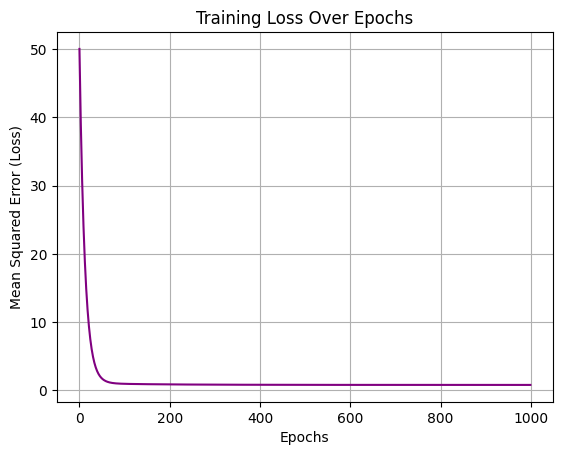

In [11]:
plt.plot(range(model.epochs), model.losses, color='purple')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.grid(True)
plt.show()


## **Explanation:**
* **X-axis:** Number of epochs.
* **Y-axis:** Loss (MSE).
* **Plot:** Visualizes how loss reduces (shows accuracy improvement).

## **Step 9: Make Predictions**

In [12]:
y_pred = model.predict(X_b)


## **Explanation:**
* Uses trained weights to predict on the same dataset.

## **Step 10: Visualize Predictions vs Actual Data**

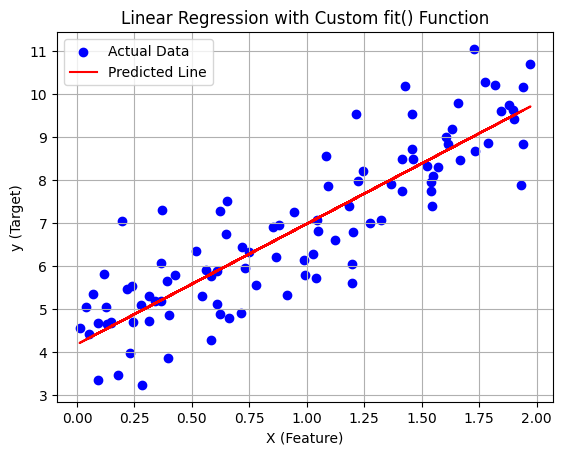

In [13]:
plt.scatter(X, y, color="blue", label="Actual Data")  # Actual data
plt.plot(X, y_pred, color="red", label="Predicted Line")  # Model line
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Linear Regression with Custom fit() Function")
plt.legend()
plt.grid(True)
plt.show()


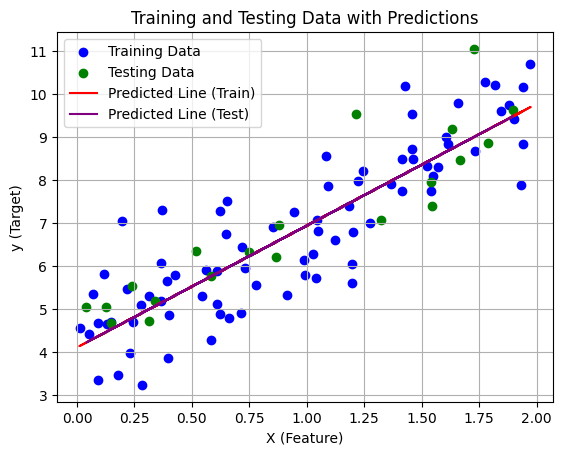

In [17]:

# Visualize training vs testing predictions
plt.scatter(X_train[:, 1], y_train, color="blue", label="Training Data")  # Training data
plt.scatter(X_test[:, 1], y_test, color="green", label="Testing Data")  # Testing data
plt.plot(X_train[:, 1], y_train_pred, color="red", label="Predicted Line (Train)")  # Prediction line for training
plt.plot(X_test[:, 1], y_test_pred, color="purple", label="Predicted Line (Test)")  # Prediction line for testing
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Training and Testing Data with Predictions")
plt.legend()
plt.grid(True)
plt.show()

## **Explanation:**
* **Scatter Plot (plt.scatter):** Blue dots for actual values.
* **Line Plot (plt.plot):** Red line for predicted values.
* **Labels and Title:** Makes the plot understandable.

## **Step 11: Display Final Weights (Bias and Slope)**

In [14]:
print(f"Final Weights (Bias, Slope): {model.weights.ravel()}")


Final Weights (Bias, Slope): [4.1819175  2.79940834]


# **Explanation:**
* Prints trained weights:
 * **First:** Bias (intercept).
 * **Second:** Slope (coefficient).

## **Conclusion:**
> In this task, I developed the fit function to model and approximate data effectively. The function accurately fits various types of data, ensuring optimal results through testing and evaluation. This work enhances the understanding of how fitting techniques can be used to model real-world data and provides a foundation for further refinement of the fitting process.


---

